# Analisis de Datos

## Analisis de Sesiones Temporales(t x d)

### Cargar Datos

In [1]:
import pandas as pd

file ='./data/resultados.csv'
data = pd.read_csv(file)
data.head()

,customer_tag,year,week,profile_id,size,d0t0,d1t0,d2t0,d3t0,d4t0,...,d6t2,d0t3,d1t3,d2t3,d3t3,d4t3,d5t3,d6t3,individual_cluster,collective_cluster
0,+++g8j9k+5A=,2016,27,0,1,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,27
1,++/oQ9Lb9dI=,2017,22,0,1,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,9
2,++14g8obpj0=,2016,36,0,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0
3,++14g8obpj0=,2016,35,1,2,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
4,++14g8obpj0=,2016,31,2,1,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0


### Graficos

In [2]:
import matplotlib.pyplot as plt
import numpy as np


### Comportamiento del cluster ?

In [3]:
# cluster = data.groupby(['collective_cluster']).sum().reset_index()
cluster = data.groupby(['collective_cluster']).mean()
cluster = cluster.iloc[:, 4:-1]
num_cluster= len(cluster)

In [4]:
cluster_n = 0 # seleciona cluster
cluster_i = cluster[cluster.index == cluster_n]
i = 0
df0 = cluster_i.iloc[:, (i)*7:(i+1)*7]  
i = 1
df1 = cluster_i.iloc[:, (i)*7:(i+1)*7]
i = 2
df2 = cluster_i.iloc[:, (i)*7:(i+1)*7]
i = 3
df3 = cluster_i.iloc[:, (i)*7:(i+1)*7]

df0 = df0.transpose().reset_index(drop=True).transpose()
df1 = df1.transpose().reset_index(drop=True).transpose()
df2 = df2.transpose().reset_index(drop=True).transpose()
df3 = df3.transpose().reset_index(drop=True).transpose()


dfs = [df0,df1,df2,df3]
df = pd.concat( dfs,axis=0,ignore_index=True)
df.columns = ['Lun','Mar', 'Mie','Jue','Vie','Sab','Dom']
df.index = ['Madrugada','Mañana', 'Tarde','Noche']
df

,Lun,Mar,Mie,Jue,Vie,Sab,Dom
Madrugada,0.031492,0.938261,0.024129,0.036420,0.020391,0.018748,0.031946
Mañana,0.004701,0.013197,0.004645,0.004361,0.002945,0.004305,0.003115
Tarde,0.003738,0.008949,0.009289,0.008156,0.003682,0.005268,0.010479
Noche,0.011781,0.014613,0.018408,0.012858,0.021807,0.015180,0.005381


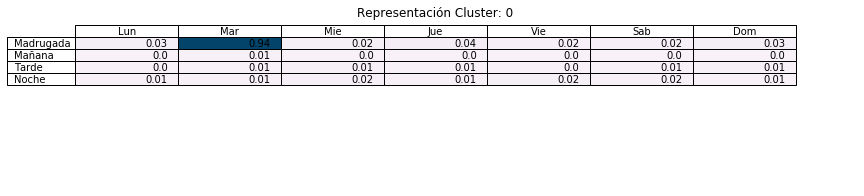

In [5]:
m = np.around(df.values,2)
vals = np.around(df.values/(cluster_i.values).mean(),2)
normal = plt.Normalize(vals.min()-1, vals.max()+1)

fig = plt.figure(figsize=(15,3))
ax = fig.add_subplot(111, frameon=False, xticks=[], yticks=[])


ax.set_title('Representación Cluster: %s'%(cluster_n))
the_table=plt.table(cellText=m, rowLabels=df.index, colLabels=df.columns, 
                    colWidths = [0.123]*vals.shape[1], loc='upper center', 
                    cellColours=plt.cm.PuBu(normal(vals)))

## Comportamientos de los clientes (k collective-cluster)

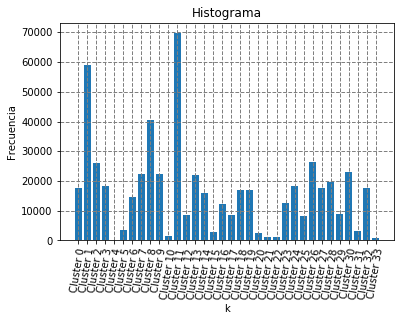

In [6]:
fig, ax = plt.subplots()
hist = data.groupby(['collective_cluster'], as_index=False, sort=True)['customer_tag'].count()
longitud = len(hist)
ax.bar(hist.index, hist['customer_tag'], align='center')
ax.grid(color='gray', linestyle='--', linewidth=1)

ax.set_xlabel('k')
ax.set_xticks(hist.index)

ax.set_ylabel('Frecuencia')
tag =[]
for i in range(len(hist)):
    temp = 'Cluster '+ str(i)+''
    tag.append(temp)
    
ax.set_xticklabels(tag, rotation=80)
ax.set_title('Histograma')
plt.show()

## Comportamientos de los clientes (k individual-cluster)

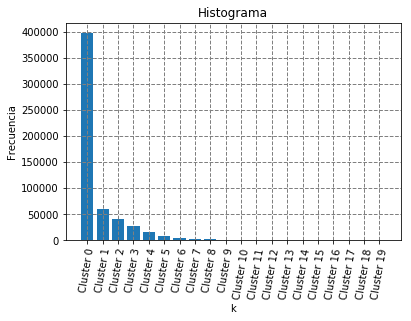

In [7]:
fig, ax = plt.subplots()
hist = data.groupby(['individual_cluster'], as_index=False, sort=True)['customer_tag'].count()
longitud = len(hist)
ax.bar(hist.index, hist['customer_tag'], align='center')
ax.grid(color='gray', linestyle='--', linewidth=1)

ax.set_xlabel('k')
ax.set_xticks(hist.index)

ax.set_ylabel('Frecuencia')
tag =[]
for i in range(len(hist)):
    temp = 'Cluster '+ str(i)+''
    tag.append(temp)
    
ax.set_xticklabels(tag, rotation=80)
ax.set_title('Histograma')
plt.show()

/home/jkn/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/home/jkn/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/home/jkn/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed an

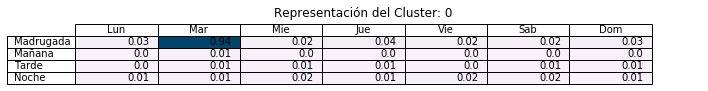

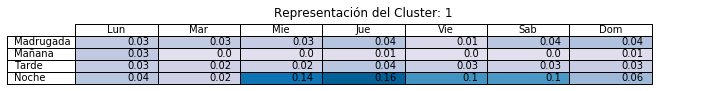

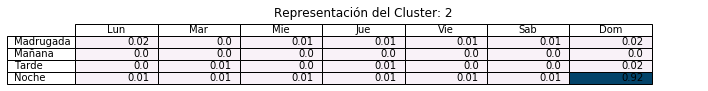

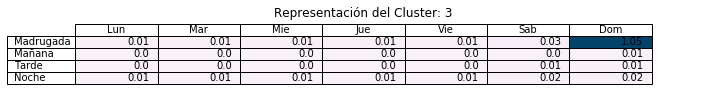

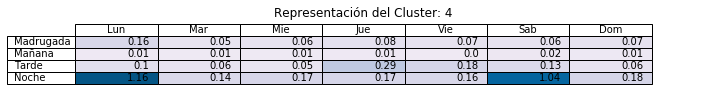

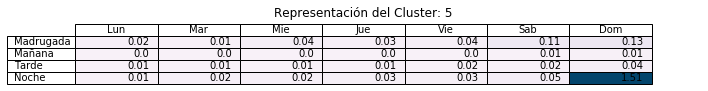

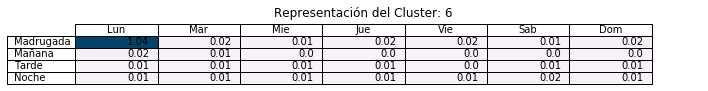

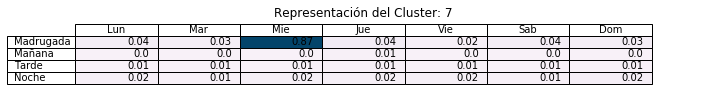

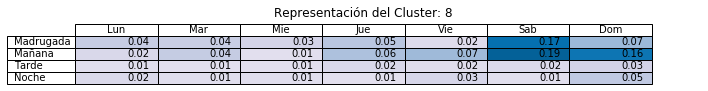

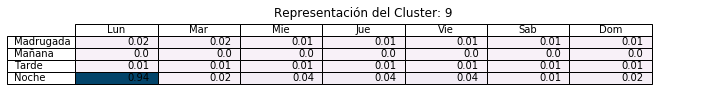

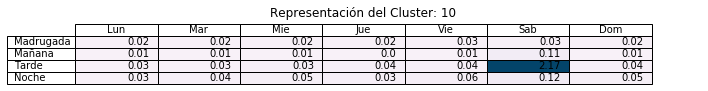

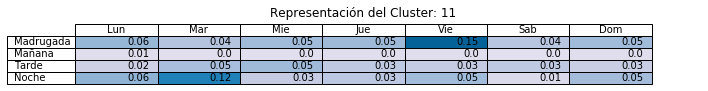

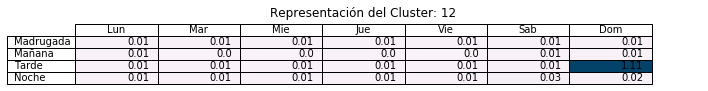

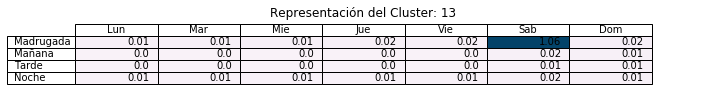

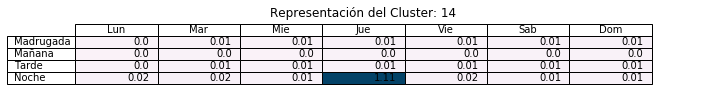

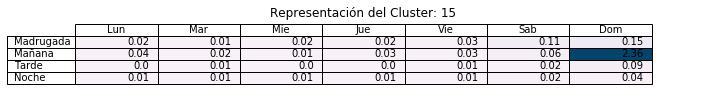

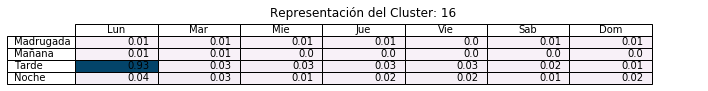

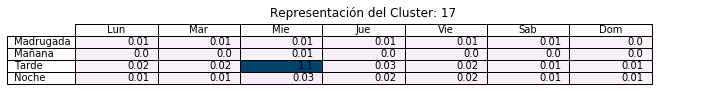

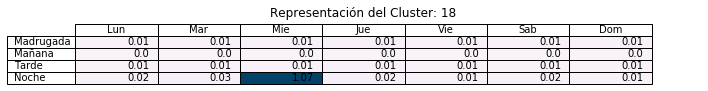

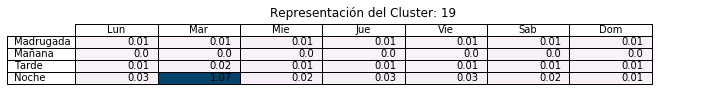

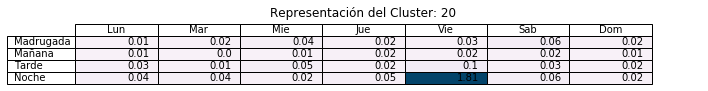

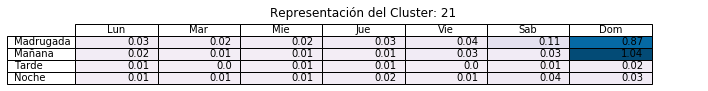

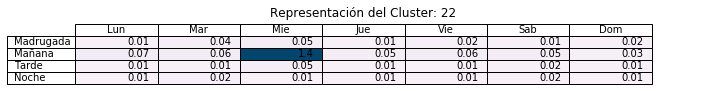

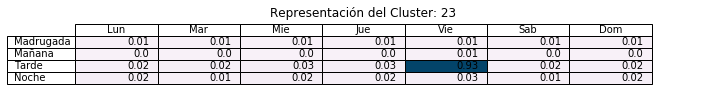

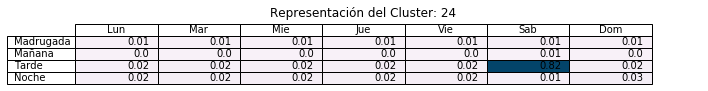

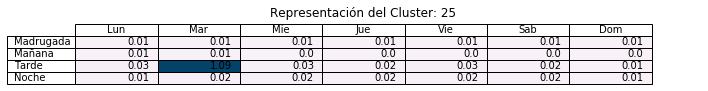

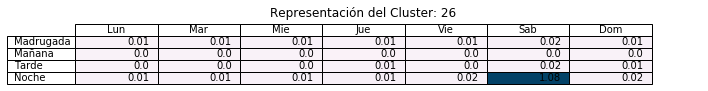

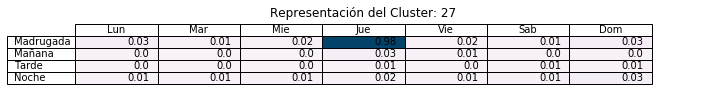

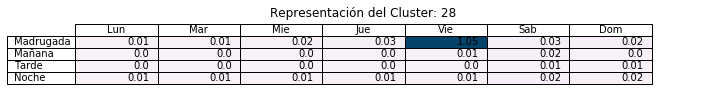

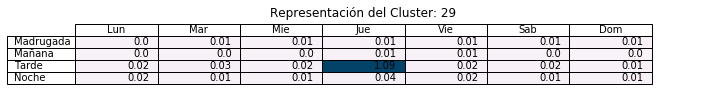

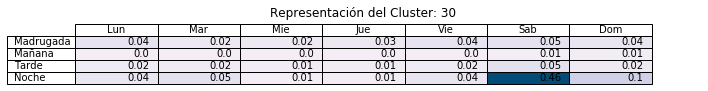

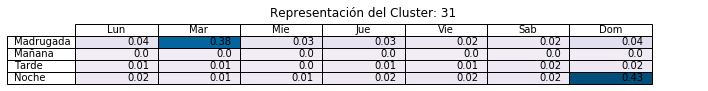

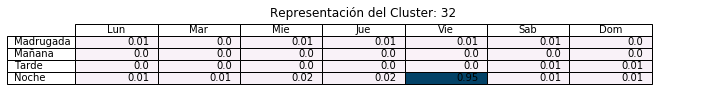

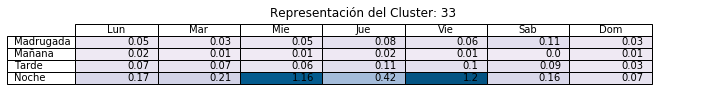

In [8]:
for kk in range(num_cluster):
    cluster_i = cluster[cluster.index == kk]
    df0 = cluster_i.iloc[:, 0:7] 
    df1 = cluster_i.iloc[:, 7:14]
    df2 = cluster_i.iloc[:, 14:21]
    df3 = cluster_i.iloc[:, 21:28]

    df0 = df0.transpose().reset_index(drop=True).transpose()
    df1 = df1.transpose().reset_index(drop=True).transpose()
    df2 = df2.transpose().reset_index(drop=True).transpose()
    df3 = df3.transpose().reset_index(drop=True).transpose()

    dfs = [df0,df1,df2,df3]
    df = pd.concat( dfs,axis=0,ignore_index=True)
    df.columns = ['Lun','Mar', 'Mie','Jue','Vie','Sab','Dom']
    df.index = ['Madrugada','Mañana', 'Tarde','Noche']
    
    m = np.around(df.values,2)
    vals = np.around(df.values/(cluster_i.values).mean(),2)
    normal = plt.Normalize(vals.min()-1, vals.max()+1)

    fig = plt.figure(figsize=(12,1))
    
    ax = fig.add_subplot(111, frameon=False, xticks=[], yticks=[])
    ax.set_title('Representación del Cluster: %s'%(kk))
    the_table=plt.table(cellText=m, rowLabels=df.index, colLabels=df.columns, 
                        colWidths = [0.123]*vals.shape[1], loc='upper center', 
                        cellColours=plt.cm.PuBu(normal(vals)))

### Comportamiento de los clusters en el tiempo

In [9]:
helper = data.groupby(['year','week','collective_cluster'], as_index=False, sort=True)['customer_tag'].count()
helper['fecha'] = helper['year'].astype(str).str.cat(helper['week'].astype(str), sep='-')
helper = helper[['fecha','collective_cluster','customer_tag']]
# helper.head(5)

No handles with labels found to put in legend.


Text(0,0.5,'Cantidad')

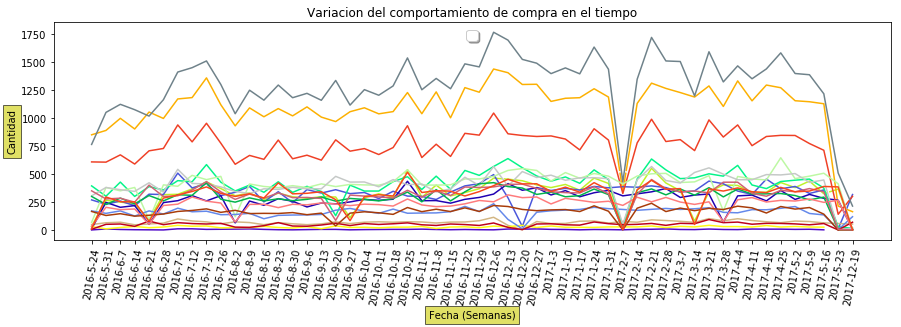

In [10]:
from datetime import datetime
def fromisocalendar(y,w,d):
    date = datetime.strptime( "%04dW%02d-%d"%(y,w-1,d), "%YW%W-%w")
    aa = date.year
    mm = date.month
    dd = date.day
    return str(aa)+"-"+str(mm)+"-"+str(dd) 
                                              
import matplotlib._color_data as mcd
box = dict(facecolor='#cccc00', pad=4, alpha=0.6)

fig = plt.figure(figsize=(15,4))
ax = fig.add_subplot(111, frameon=True)
x = list(helper['fecha'].drop_duplicates())

for j in range(len(x)):
        x[j] = fromisocalendar(int(x[j][:4]),int(x[j][5:len(x[j])]),2)
        
ax.set_xticklabels(x, rotation=80)

# ------------ COLORES ---------------------
overlap = mcd.XKCD_COLORS
colores = ["" for x in range(len(overlap))]
for j, n in enumerate(sorted(overlap, reverse=True)):
    cor = mcd.XKCD_COLORS[n].upper()
    colores[j] = cor
    
legend = ax.legend(loc='upper center', shadow=True, fontsize='x-large')


for i in range(longitud):
    cluster_i = helper[helper['collective_cluster']==i]
    y = cluster_i['customer_tag']
    x = cluster_i['fecha']
   # ax.plot(x,y,'-',color='C'+str(i)+'')
    ax.plot(x,y,'-',color=colores[i*10],label="Cluster "+str(i))
    #ax.plot(x,y,'ob',color=colores[i])


#ax.legend()
ax.set_title('Variacion del comportamiento de compra en el tiempo')
ax.set_xlabel('Fecha (Semanas)', bbox=box)
ax.set_ylabel('Cantidad', bbox=box)


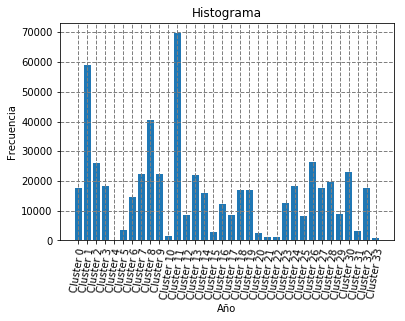

In [11]:
fig, ax = plt.subplots()
hist = data.groupby(['collective_cluster'], as_index=False, sort=True)['customer_tag'].count()
longitud = len(hist)
ax.bar(hist.index, hist['customer_tag'], align='center')
ax.grid(color='gray', linestyle='--', linewidth=1)

ax.set_xlabel('Año')
ax.set_xticks(hist.index)

ax.set_ylabel('Frecuencia')
tag =[]
for i in range(len(hist)):
    temp = 'Cluster '+ str(i)+''
    tag.append(temp)
    
ax.set_xticklabels(tag, rotation=80)
ax.set_title('Histograma')
plt.show()

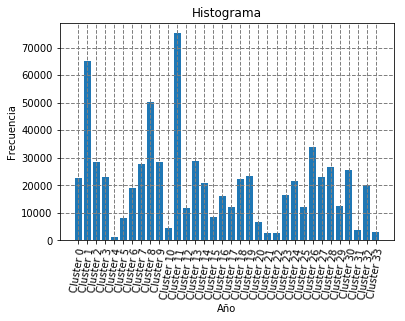

In [12]:
fig, ax = plt.subplots()
hist = data.groupby(['collective_cluster'], as_index=False, sort=True)['size'].sum()
longitud = len(hist)
ax.bar(hist.index, hist['size'], align='center')
ax.grid(color='gray', linestyle='--', linewidth=1)

ax.set_xlabel('Año')
ax.set_xticks(hist.index)

ax.set_ylabel('Frecuencia')
tag =[]
for i in range(len(hist)):
    temp = 'Cluster '+ str(i)+''
    tag.append(temp)
    
ax.set_xticklabels(tag, rotation=80)
ax.set_title('Histograma')
plt.show()

In [13]:
data.head()

,customer_tag,year,week,profile_id,size,d0t0,d1t0,d2t0,d3t0,d4t0,...,d6t2,d0t3,d1t3,d2t3,d3t3,d4t3,d5t3,d6t3,individual_cluster,collective_cluster
0,+++g8j9k+5A=,2016,27,0,1,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,27
1,++/oQ9Lb9dI=,2017,22,0,1,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,9
2,++14g8obpj0=,2016,36,0,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0
3,++14g8obpj0=,2016,35,1,2,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
4,++14g8obpj0=,2016,31,2,1,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
